In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display as display
import plotly.graph_objs as go

In [2]:
state_year_month_df=pd.read_csv(r'D:\MYDOWNLOADS\road-accidents-in-india\only_road_accidents_data_month2.csv')
state_year_time_df=pd.read_csv(r'D:\MYDOWNLOADS\road-accidents-in-india\only_road_accidents_data3.csv')
state_year_month_df = state_year_month_df.rename(columns = {'STATE/UT':'AREA'})
state_year_time_df= state_year_time_df.rename(columns = {'STATE/UT':'AREA'})

In [3]:
state_year_month_df['AREA'] = state_year_month_df['AREA'].replace({'A & N Islands': 'Dwarka Mor','Andhra Pradesh': 'Preet Vihar','Arunachal Pradesh': 'Krishna Nagar', 'Assam': 'Rohini','Bihar': 'Karol Bagh','Chandigarh':'Chandni Chowk','Chhattisgarh':'Uttam Nagar','D&N Haveli':'Shahdara','Daman & Diu':'Karkardooma','Delhi Ut':'Pragati Maidan','Goa':'Punjabi Bagh','Gujarat':'Rajouri Garden','Haryana':'Subhash Nagar','Himachal Pradesh':'RK Ashram Marg','Jammu & Kashmir':'Jhilmil','Jharkhand':'Anand Vihar',
 'Karnataka': 'Rajiv Chowk','Kerala': 'Mandi House','Lakshadweep': 'Lakshmi Nagar','Madhya Pradesh': 'Janakpuri','Maharashtra': 'Jagatpuri', 'Manipur': 'Vikas Colony','Meghalaya': 'Shalimar Bagh','Mizoram': 'Peeragarhi','Nagaland': 'NSP','Odisha': 'Pitampura','Puducherry': 'Rithala','Punjab': 'Seelampur','Rajasthan': 'Majlis Park', 'Sikkim': 'Shastri Nagar','Tamil Nadu': 'Shastri Park','Tripura': 'Adarsh Nagar','Uttar Pradesh': 'Mansarovar Park','Uttarakhand': 'Model Town', 'West Bengal': 'Vikas Puri'})

In [4]:
state_year_month_df.head()

,AREA,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,Dwarka Mor,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,Dwarka Mor,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,Dwarka Mor,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,Dwarka Mor,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,Dwarka Mor,2005,19,21,22,17,13,19,21,14,15,19,10,16,206


In [5]:
state_year_month_df['SUMMER']=state_year_month_df[['JUNE','JULY','AUGUST']].sum(axis=1)
state_year_month_df['AUTUMN']=state_year_month_df[['SEPTEMBER','OCTOBER','NOVEMBER']].sum(axis=1)
state_year_month_df['WINTER']=state_year_month_df[['DECEMBER','JANUARY','FEBRUARY']].sum(axis=1)
state_year_month_df['SPRING']=state_year_month_df[['MARCH','APRIL','MAY']].sum(axis=1)

#Delete month columns..
state_year_month_df=state_year_month_df.drop(['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY'
                                             ,'AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'], axis=1)
#Create groups of states, summing the values of accident number for each year..
state_grouped=state_year_month_df.groupby(['AREA']).sum()

#Create % columns for noting the % of accidents happening in each state for each season..
state_grouped['%_SUMMER']=state_grouped['SUMMER']/state_grouped['TOTAL']
state_grouped['%_AUTUMN']=state_grouped['AUTUMN']/state_grouped['TOTAL']
state_grouped['%_WINTER']=state_grouped['WINTER']/state_grouped['TOTAL']
state_grouped['%_SPRING']=state_grouped['SPRING']/state_grouped['TOTAL']

display(state_grouped.iloc[:,1:].head())

,TOTAL,SUMMER,AUTUMN,WINTER,SPRING,%_SUMMER,%_AUTUMN,%_WINTER,%_SPRING
AREA,,,,,,,,,
Adarsh Nagar,10534,2525,2638,2716,2655,0.239700,0.250427,0.257832,0.252041
Anand Vihar,46209,11356,10875,11278,12700,0.245753,0.235344,0.244065,0.274838
Chandni Chowk,6411,1507,1706,1577,1621,0.235065,0.266105,0.245983,0.252847
D & N Haveli,1216,280,279,355,302,0.230263,0.229441,0.291941,0.248355
Delhi (Ut),110964,27689,28782,27022,27471,0.249531,0.259381,0.243520,0.247567


In [6]:
state_year_time_df['AREA'] = state_year_time_df['AREA'].replace({'A & N Islands': 'Dwarka Mor','Andhra Pradesh': 'Preet Vihar','Arunachal Pradesh': 'Krishna Nagar', 'Assam': 'Rohini','Bihar': 'Karol Bagh','Chandigarh':'Chandni Chowk','Chhattisgarh':'Uttam Nagar','D&N Haveli':'Shahdara','Daman & Diu':'Karkardooma','Delhi Ut':'Pragati Maidan','Goa':'Punjabi Bagh','Gujarat':'Rajouri Garden','Haryana':'Subhash Nagar','Himachal Pradesh':'RK Ashram Marg','Jammu & Kashmir':'Jhilmil','Jharkhand':'Anand Vihar',
 'Karnataka': 'Rajiv Chowk','Kerala': 'Mandi House','Lakshadweep': 'Lakshmi Nagar','Madhya Pradesh': 'Janakpuri','Maharashtra': 'Jagatpuri', 'Manipur': 'Vikas Colony','Meghalaya': 'Shalimar Bagh','Mizoram': 'Peeragarhi','Nagaland': 'NSP','Odisha': 'Pitampura','Puducherry': 'Rithala','Punjab': 'Seelampur','Rajasthan': 'Majlis Park', 'Sikkim': 'Shastri Nagar','Tamil Nadu': 'Shastri Park','Tripura': 'Adarsh Nagar','Uttar Pradesh': 'Mansarovar Park','Uttarakhand': 'Model Town', 'West Bengal': 'Vikas Puri'})

In [7]:
#Working on the over the day data...
state_year_time_df.rename(columns={'0-3 hrs. (Night)':'0-3',
                              '3-6 hrs. (Night)':'3-6',
                                '6-9 hrs (Day)':'6-9', '9-12 hrs (Day)':'9-12','12-15 hrs (Day)':'12-15','15-18 hrs (Day)':'15-18',
                                  '18-21 hrs (Night)':'18-21','21-24 hrs (Night)':'21-24'}, inplace=True)
state_time_grouped=state_year_time_df.groupby(['AREA']).sum()

state_time_grouped['%_MORNING']=(state_time_grouped['6-9']+state_time_grouped['9-12'])/state_time_grouped['Total']
state_time_grouped['%_AFTERNOON']=(state_time_grouped['12-15']+state_time_grouped['15-18'])/state_time_grouped['Total']
state_time_grouped['%_EVENING']=(state_time_grouped['18-21']+state_time_grouped['21-24'])/state_time_grouped['Total']
state_time_grouped['%_NIGHT']=(state_time_grouped['0-3']+state_time_grouped['3-6'])/state_time_grouped['Total']

state_time_grouped=state_time_grouped.drop(state_time_grouped.columns[0:9], axis=1)
display(state_time_grouped.head())

,Total,%_MORNING,%_AFTERNOON,%_EVENING,%_NIGHT
AREA,,,,,
Adarsh Nagar,10534,0.382286,0.406019,0.182267,0.029429
Anand Vihar,46209,0.302603,0.299054,0.221948,0.176394
Chandni Chowk,6411,0.209172,0.303073,0.390111,0.097645
D & N Haveli,1303,0.218726,0.330008,0.391404,0.059862
Delhi (Ut),119274,0.227627,0.266940,0.336536,0.168897


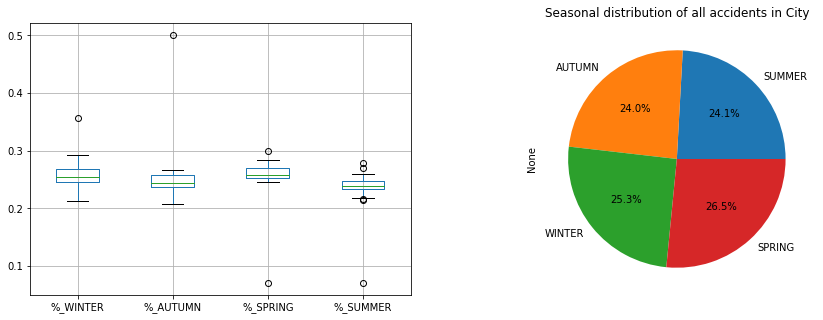

In [8]:
plt.figure(figsize=(15,5))
ax=plt.subplot(1,2,1)
boxplot=state_grouped.boxplot(ax=ax,column=['%_WINTER','%_AUTUMN','%_SPRING','%_SUMMER'])

ax=plt.subplot(1,2,2)
state_grouped.loc[:,'SUMMER':'SPRING'].sum(axis=0).plot.pie(title='Seasonal distribution of all accidents in City',autopct='%1.1f%%')

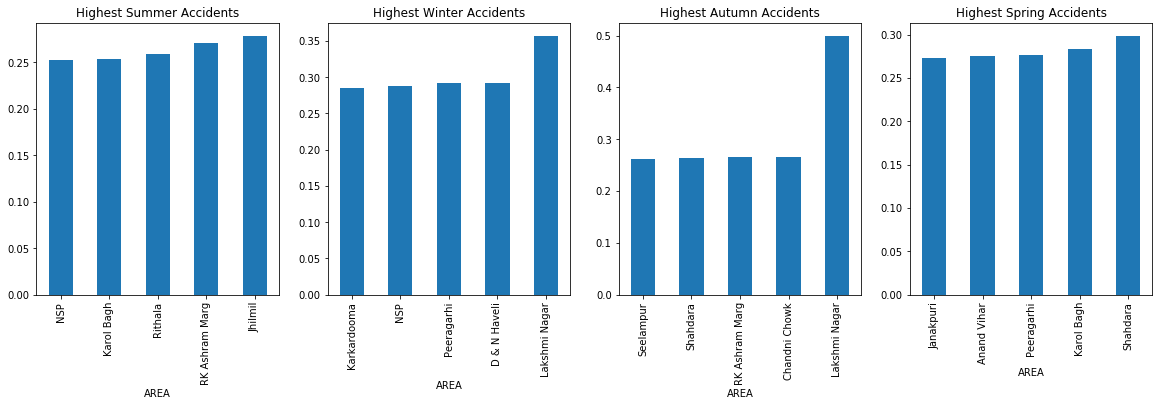

In [9]:
plt.figure(figsize=(20,5))
plt.subplot(141)
summer_sorted=state_grouped.sort_values('%_SUMMER')
summer_sorted['%_SUMMER'].tail().plot.bar(title='Highest Summer Accidents')
plt.subplot(142)
winter_sorted=state_grouped.sort_values('%_WINTER')
winter_sorted['%_WINTER'].tail().plot.bar(title='Highest Winter Accidents')
plt.subplot(143)
autumn_sorted=state_grouped.sort_values('%_AUTUMN')
autumn_sorted['%_AUTUMN'].tail().plot.bar(title='Highest Autumn Accidents')
plt.subplot(144)
spring_sorted=state_grouped.sort_values('%_SPRING')
spring_sorted['%_SPRING'].tail().plot.bar(title='Highest Spring Accidents')

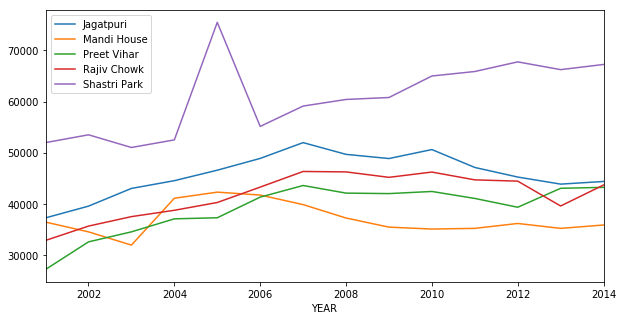

In [10]:
highest_accident_states=state_grouped.sort_values('TOTAL', ascending=False)
high_states=list(highest_accident_states.head().index)
df4=state_year_month_df.loc[state_year_month_df['AREA'].isin(high_states),['AREA','YEAR','TOTAL']]

plt.figure(figsize=(10,5))
ax=plt.subplot(111)
for key, grp in df4.groupby(['AREA']):
    ax = grp.plot(ax=ax, kind='line', x='YEAR', y='TOTAL', label=key)
  
plt.show()

In [11]:
highest_accident_states=state_grouped.sort_values('TOTAL', ascending=False)
state_list=list(highest_accident_states.head().index)
print(state_list)

['Shastri Park', 'Jagatpuri', 'Rajiv Chowk', 'Preet Vihar', 'Mandi House']


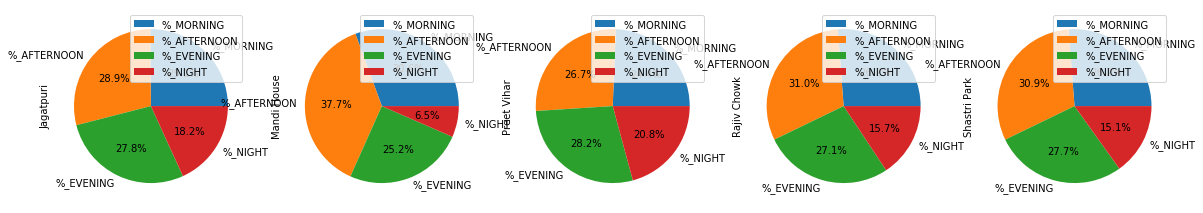

In [12]:
df=state_time_grouped.loc[state_time_grouped.index.isin(state_list)]

df_T=df.groupby('AREA').sum().drop(['Total'], axis=1).T.plot.pie(subplots=True, figsize=(20, 5),autopct='%1.1f%%')

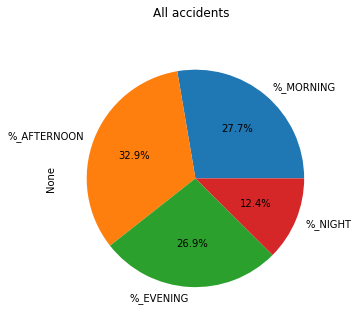

In [13]:
df2=state_time_grouped.sum(axis=0)
df2.drop(['Total']).T.plot.pie(title='All accidents',subplots=True, figsize=(5,5),autopct='%1.1f%%')

df2=state_time_grouped.sum(axis=0)

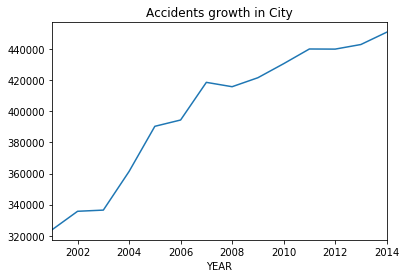

In [14]:
df3=state_year_time_df.groupby(['YEAR']).sum()
df3.loc[:,'Total'].plot(title='Accidents growth in City')

D:\Anaconda\envs\tf_gpu\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike

D:\Anaconda\envs\tf_gpu\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike

D:\Anaconda\envs\tf_gpu\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprec

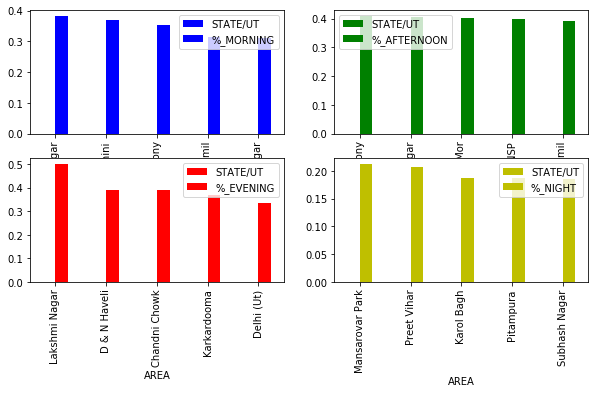

In [15]:
plt.figure(figsize=(10,5))
state_time_grouped.sort_values('%_MORNING',ascending=False).head().loc[:,['STATE/UT','%_MORNING']].plot(kind='bar', ax=plt.subplot(221), color='b')
state_time_grouped.sort_values('%_AFTERNOON',ascending=False).head().loc[:,['STATE/UT','%_AFTERNOON']].plot(kind='bar', ax=plt.subplot(222),color='g')
state_time_grouped.sort_values('%_EVENING',ascending=False).head().loc[:,['STATE/UT','%_EVENING']].plot(kind='bar', ax=plt.subplot(223),color='r')
state_time_grouped.sort_values('%_NIGHT',ascending=False).head().loc[:,['STATE/UT','%_NIGHT']].plot(kind='bar', ax=plt.subplot(224),color='y')